In [36]:
import requests, json, numpy, datetime
import pywren
import boto3
import numpy as np

In [37]:
GEOJSONS = ['train-borde_rural.geojson', 'train-borde_soacha.geojson',
            'train-castries.geojson', 'train-dennery.geojson',
            'train-gros_islet.geojson', 'train-mixco_1_and_ebenezer.geojson',
            'train-mixco_3.geojson']

In [38]:
BUCKET = 'mapping-disaster-risk'

TIFS = ['borde_rural_ortho-cog.tif', 'borde_soacha_ortho-cog.tif',
        'castries_ortho-cog.tif', 'dennery_ortho-cog.tif',
        'gros_islet_ortho-cog.tif', 'mixco_1_and_ebenezer_ortho-cog.tif',
        'mixco_3_ortho-cog.tif']

# Note that all geojsonn names are the object names as well, so to access an object call:
# https://mapping-disaster-risk.s3.amazonaws.com/train-borde_rural.geojson

In [39]:
# Step 1: Get all geojsons and create new footprint dictionaries
def get_geojsons(geojson):
    '''
    Load geojson, extract relevant information, return as a dictionary.
    '''
    try:
        s3 = boto3.client('s3', 'us-east-1')
        obj = s3.get_object(Bucket='mapping-disaster-risk', Key=geojson)
        geo_json = json.load(obj['Body'])
        polygons = []
        for feature in geo_json['features']:
            polygon = {}
            polygon['type'] = feature['geometry']
            polygon['bid'] = feature['id']
            polygon['roof_material'] = feature['properties']['roof_material']
            polygon['coordinates'] = feature['geometry']['coordinates']
            polygon['geojson'] = geojson
            polygons.append(polygon)
    except Exception as e:
        return e

    return polygons

In [40]:
from rasterio.plot import show

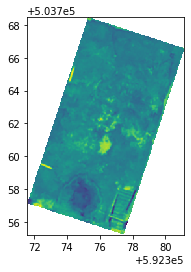

In [41]:
with rasterio.open('https://mapping-disaster-risk.s3.amazonaws.com/tst3.tif') as tiff:
    show(tiff)

In [42]:
with rasterio.open('https://mapping-disaster-risk.s3.amazonaws.com/borde_rural_ortho-cog.tif') as tiff:
    show(tiff)
    

RasterioIOError: '/vsicurl/https://mapping-disaster-risk.s3.amazonaws.com/borde_rural_ortho-cog.tif' not recognized as a supported file format.

In [44]:
!pip3 install rasterio[s3]

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [46]:
import gdal

ModuleNotFoundError: No module named 'gdal'

In [45]:
driver = gdal.GetDriverByName('GTiff')

NameError: name 'gdal' is not defined

In [ ]:
s3 = boto3.client('s3')
s3.upload_file('path_to_tif_file.tif', 'bucket_name', 'path_on_s3.tif')

In [43]:
with rasterio.open('//vsicurl/https://mapping-disaster-risk.s3.amazonaws.com/borde_rural_ortho-cog.tif') as src:
    print(src.profile)

RasterioIOError: /https://mapping-disaster-risk.s3.amazonaws.com/borde_rural_ortho-cog.tif: No such file or directory

In [34]:
s3 = boto3.client('s3', 'us-east-1')
obj = s3.get_object(Bucket='mapping-disaster-risk', Key='borde_soacha_ortho-cog.tif')

In [8]:
body = obj['Body']

In [35]:
obj

{'ResponseMetadata': {'RequestId': '9B9AF0540347F72E',
  'HostId': 'Jghmpn6bhUTiJ0Fj4UbEPgYfZPxeobvUAGzRbOL/ooy/FX6QGsX57P9MEostHYfpKE+HUe3NFLU=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Jghmpn6bhUTiJ0Fj4UbEPgYfZPxeobvUAGzRbOL/ooy/FX6QGsX57P9MEostHYfpKE+HUe3NFLU=',
   'x-amz-request-id': '9B9AF0540347F72E',
   'date': 'Fri, 05 Jun 2020 00:57:07 GMT',
   'last-modified': 'Mon, 01 Jun 2020 00:16:17 GMT',
   'etag': '"be5c2e124ec71c95ce88c786e4926f12-868"',
   'accept-ranges': 'bytes',
   'content-type': 'binary/octet-stream',
   'content-length': '4548630731',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2020, 6, 1, 0, 16, 17, tzinfo=tzutc()),
 'ContentLength': 4548630731,
 'ETag': '"be5c2e124ec71c95ce88c786e4926f12-868"',
 'ContentType': 'binary/octet-stream',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x1be95b090>}

In [9]:
body

In [5]:
import rasterio
import matplotlib.pyplot as plt
import io

In [17]:
s3 = boto3.resource('s3', region_name='us-east-2')
bucket = s3.Bucket('mapping-disaster-risk')
object = bucket.Object('borde_rural_ortho-cog.tif')

In [ ]:
tst = rasterio.open(obj['Body'])

In [10]:
tst

In [ ]:
def transform_coordinates():
    pass

In [ ]:
def get_tif():
    pass

In [ ]:
def get_rooftop_array_after_mask():
    pass

In [ ]:
def convert_grayscale():
    pass

In [ ]:
def crop_center():
    pass

In [ ]:
def calculate_zonal_stats():
    pass

In [ ]:
def build_df():
    pass

In [18]:
# Obtain footprint dictionaries
# Returns a list of lists, where each list are polygons for one .tif file
pwex = pywren.default_executor()
futures = pwex.map(get_geojsons, GEOJSONS)
polygons = pywren.get_all_results(futures)